In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Correlation and Similarity
Correlation is one of the most fundamental and important analysis methods in statistics and machine learning. A correlation coefficient is a single number that quantifies the linear relationship between two variables. Correlation coefficients range from -1 to +1 with -1 indicating a perfect negative relationship, +1 a perfect positive relationship, and 0 indicating no linear relationship. 

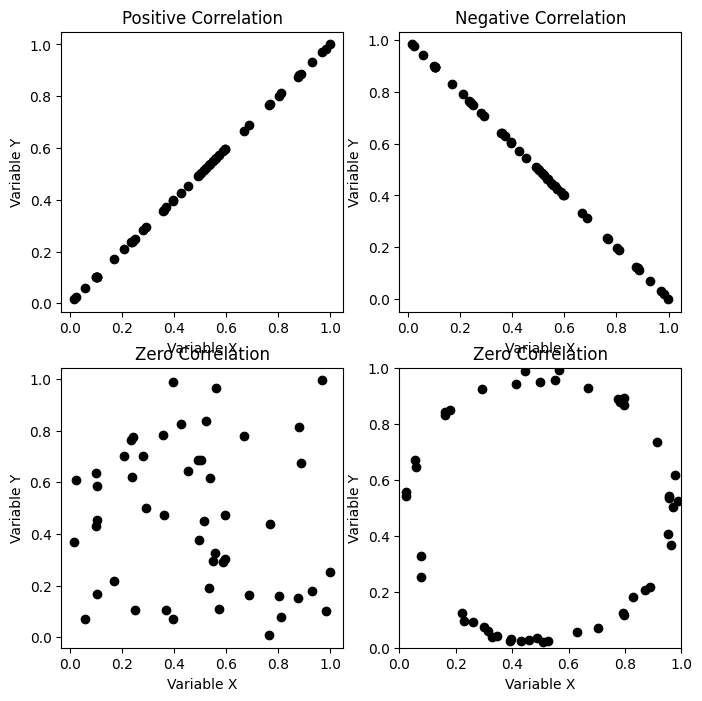

In [47]:
#positive correlation
p = np.random.random(50)
q = np.random.random(50)

cx = .5+ np.random.uniform(.45,.5,50)*np.sin(np.pi*p*2)
cy = .5+ np.random.uniform(.45,.5,50)*np.cos(np.pi*p*2)

fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(8,8))
ax1.plot(p,p,c='k',marker='o',ls='')
ax1.set_title('Positive Correlation')
ax1.set_xlabel('Variable X')
ax1.set_ylabel('Variable Y')

ax2.set_title('Negative Correlation')
ax2.plot(p,-p+1,c='k',marker='o',ls='')
ax2.set_xlabel('Variable X')
ax2.set_ylabel('Variable Y')

ax3.set_title('Zero Correlation')
ax3.plot(p,q,c='k',marker='o',ls='')
ax3.set_xlabel('Variable X')
ax3.set_ylabel('Variable Y')

ax4.set_title('Zero Correlation')
ax4.plot(cx,cy,c='k',marker='o',ls='')
ax4.set_xlabel('Variable X')
ax4.set_ylabel('Variable Y')
ax4.set(xlim=(0,1),ylim=(0,1))
plt.show()


The dot product is involved in the correlation coefficient, and the magnitude of the dot product is related to the magnitude of the numerical values in the data. Therefore, the correlation coefficient requires some normalizations to be in the expected range of -1 to +1. Those two normalizations are:

Mean Center each variable:<br>
Mean centering means subtracting the average value from each data value.

Divide the dot product by the product of the vector norms:<br>
This divisive normalization cancels the measurement units and scales the maximum possible correlation magnitude to |1|.

the formula for the Pearson correlation coefficient is below:<br>
$\rho = \frac{\Sigma_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\Sigma_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\Sigma_{i=1}^{n}(y_i-\bar{y^2})}}$

Correlation is simply three dot products. The following equation shows the same formula rewritten using the linear algebra dot product notation. In this equation, $\tilde{x}$ is the mean-centered version of $x$ (that is variable $x$ with normalization applied).

The Pearson correlation coefficient is expressed in the parlance of linear algebra:

$\rho = \frac{\tilde{x}^T\tilde{y}}{\lVert\tilde{x}\rVert\lVert\tilde{y}\rVert}$

The Pearson correlation coefficient is simply the dot product between the two variables, normalized by the magnitudes of the variables.

Correlation is not the only way to assess the similarity between two variables. Another method is called cosine similarity. The formula for cosine similarity is simply the geometric formula for the dot product solved for the cosine term.

$cos(\theta_{x,y}) = \frac{\alpha}{\lVert x\rVert\lVert y\rVert}$

where $\alpha$ is the dot product between $x$ and $y$.

The first formula is the full equation, whereas the second is a simplification assuming that the variables have already been mean-centered. Thus, cosine similarity does not involve the first normalization factor.

The Pearson correlation and cosine similarity reflect the linear relationship between the two variables: they are based on the dot product, and the dot product is a linear operation

## Time Series Filtering and Feature Detection
The dot product is also used in times series filtering. Filtering is essentially a feature-detection method, whereby a template, called a kernel in the parlance of filtering- is matched against portions of a time series signal, and the result of filtering is another time series that indicates how much the characteristics of the signal match the characteristics of the kernel. Kernels are carefully constructed to optimize certain criteria, such as smooth fluctuations, sharp edges, particular waveform shapes, and so on.

The mechanism of filtering is to compute the dot product between the kernel and the time series signal. But filtering usually requires local feature detection, and the kernel is typically much shorter than the entire time series. Therefore, we compute the dot product between the kernel and a short snippet of the data of the same length as the kernel.

This procedure produces one time point in the filtered signal and then the kernel is moved one time step to the right to compute the dot product with a different signal segment. Formally, this procedure is called convolution, and involves a few additional steps.

## K-Means Clustering
k-means clustering is an unsupervised method of classifying multivariate data into a relatively small number of groups, or categories based on minimizing distance to the group center.

k-means clustering is an important analysis method in machine learning. Here we will implement a particular version of k-means clustering, with the goal of seeing how concepts about vectors are used in the k-means algorithm.

Here is a brief description of the algorithm that we will write:<br>
1. Initialize k centroids as random points in the data space. Each centroid is a class, or category and the next steps will assign each data observation to each class.
2. Compute the Euclidean distance between each data observation and each centroid.
3. Assign each data observation to the group with the closest centroid.
4. Update each centroid as the average of all data observations assigned to that centroid.
5. Repeats steps 2-4 until a convergence criteria is satisfied, or for N iterations.




Step 1:<br>
Initialize k random cluster centroids. k is a parameter of k-means clustering; in real data, it's difficult to determine the optimal k, but here it will be 3.

There are several ways to initialize random cluster centroids; Here we will randomly select k data samples to be centroids. The data is contained in variable data (this is a 150x2, corresponding to 150 observations and 2 features)

Step 2:<br>
Compute the distance between each data observation and each cluster centroid. For one data observation and centroid, Euclidean distance is computed as:

$\delta_{i,j} = \sqrt{(d^{x}_i-c^{x}_j)^2+(d^{y}_i-c^{y}_j)^2}$

where $\delta_{i,j}$ indicates the distance from data observation i to centroid j, $d^{x}_i$  is feature $x$ of the $i^{th}$ data observation, and $c^{x}_j$ is the x-axis coordinate of centroid j.

We can use vectors and broadcasting to make this operation compact and efficient. 

Step 3:<br>
Assign each data observation to the group with minimum distance.

Step 4:<br>
Recompute the centroids as the mean of all data points within the class. 

Step 5:<br>
To put the previous steps in a loop that iterates until a good solution is obtained. In production-level k-means algorithms, the iterations continue until a stopping criterion is reached. i.e the cluster centroids are no longer moving around. For simplicity, we will iterate three times.

In [224]:
data = np.random.random((150,2))*10

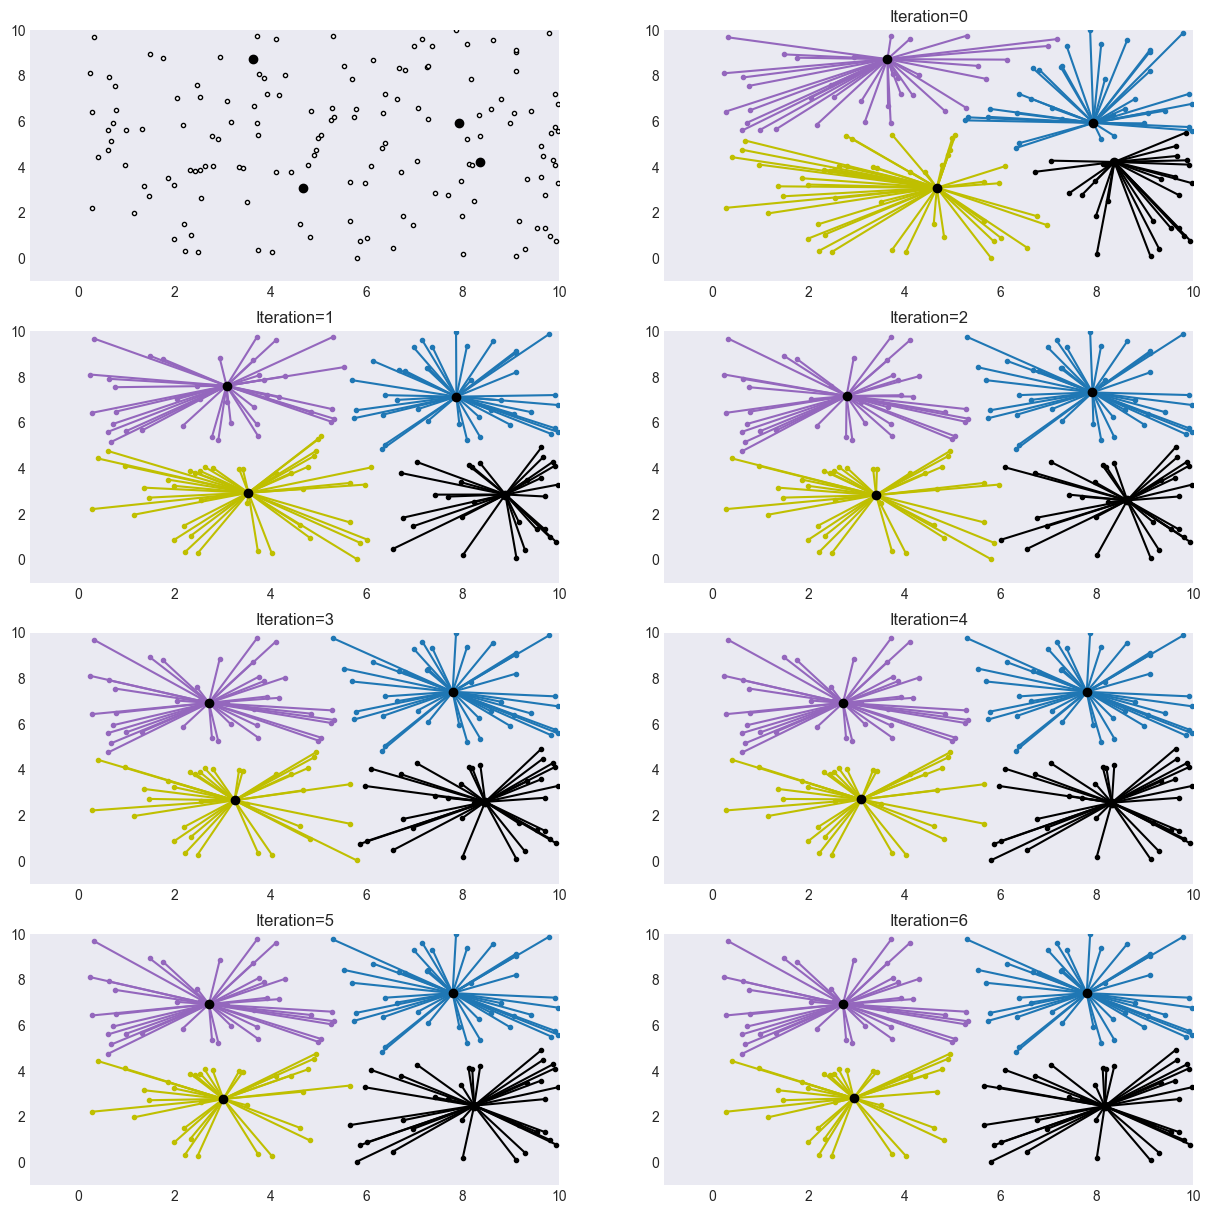

In [227]:
fig,axs = plt.subplots(4,2,figsize=(15,15))

#data initialization
k = 4

ridx = np.random.choice(len(data),k,replace=False)#choose k random points as centroids
centroids = data[ridx,:]

#plotting initial data
axs[0,0].plot(centroids[:,0],centroids[:,1],marker='o',color='k',ls='')
axs[0,0].scatter(data[:,0],data[:,1],c='w',marker='.',edgecolor='k')
axs[0,0].set(xlim=(-1,10),ylim=(-1,10))

x,y = 0,0
color={0:'C0',1:'y',2:'C4',3:'k'}
for j in range(0,7): 
    y+=1
    x = x+1 if y%2==0 else x
    y = y%2
    #calculate the squared euclidean distance using numpy and broadcast operations
    dists = np.zeros((data.shape[0],k))
    for ci in range(k):
            dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
    
    #select the minimum distance from the 3 columns of distances
    groupidx = np.argmin(dists,axis=1)
    
    #plotting the new classes
    for i in range(len(data)):
        axs[x,y].plot((data[i][0],centroids[groupidx[i]][0]),(data[i][1],centroids[groupidx[i]][1]),marker='.',color=color[groupidx[i]])
    axs[x,y].plot(centroids[:,0],centroids[:,1],marker='o',color='k',ls='')
    axs[x,y].set_title(f'Iteration={j}') 
    axs[x,y].set(xlim=(-1,10),ylim=(-1,10))
    #calculate the new centroids
    for ki in range(k):
        centroids[ki,:] = [np.mean(data[groupidx==ki,0]),np.mean(data[groupidx == ki,1])]
    
plt.show()

In [200]:
a = np.random.random(150)
b = np.random.random(150)

a_tilde=a-np.mean(a)
b_tilde=b-np.mean(b)

# pearson_correlation= np.dot(a_tilde,b_tilde)/(np.sqrt(np.sum(a_tilde**2))*np.sqrt(np.sum(b_tilde**2)))
# print(pearson_correlation,np.corrcoef(a,b))
from scipy.spatial.distance import cosine
print(cosine(a,b))
print(1-np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))

0.23502082711320926
0.23502082711320915


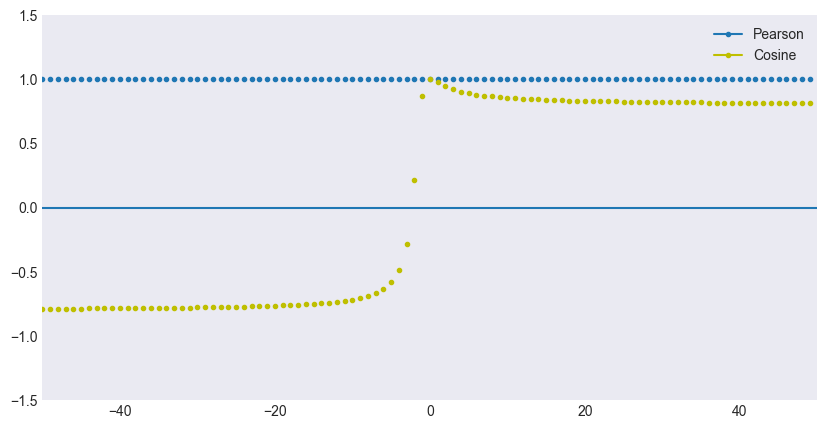

In [221]:
plt.style.use('seaborn-v0_8-dark')
a = np.arange(0,4)
b = np.arange(-50,50)
fig,ax = plt.subplots(figsize=(10,5))

for i in range(0,100):
    corr = np.corrcoef(a,a+b[i])
    cosine = np.dot(a,a+b[i])/(np.linalg.norm(a)*np.linalg.norm(a+b[i]))
    pea, = ax.plot(i-50,corr[0,1],marker='.',color='C0',label='Pearson')
    cos, = ax.plot(i-50,cosine,marker='.',color='y',label='Cosine')
ax.plot((-50,50),(0,0),ls='-')
ax.legend(handles=[pea,cos],labels=['Pearson','Cosine'])
ax.set(xlim=(-50,50),ylim=(-1.5,1.5))
plt.show()

In [216]:
from scipy.stats import pearsonr
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None)
Source:   
def pearsonr(x, y, *, alternative='two-sided', method=None):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelat

## $f(r) = \frac{{(1-r^2)}^{n/2-2}}{\mathrm{B}(\frac{1}{2},\frac{n}{2}-1)}$